<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [ ]:
#Importing Libraries
# please do go through this python notebook:
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from pandas import read_hdf
train1 = read_hdf('/content/drive/My Drive/storage_sample_stage4.h5', 'train_df',mode='r')
test1 = read_hdf('/content/drive/My Drive/storage_sample_stage4.h5', 'test_df',mode='r')

In [ ]:
train1.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [ ]:
y_train = train1.indicator_link
y_test = test1.indicator_link

In [ ]:
train22=train1[['source_node', 'destination_node','indicator_link']]
test22=test1[['source_node', 'destination_node','indicator_link']]

In [ ]:
train1.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
test1.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [ ]:
graph1=nx.from_pandas_edgelist(train22, 'source_node', 'destination_node', ['indicator_link'])
graph2=nx.from_pandas_edgelist(test22, 'source_node', 'destination_node', ['indicator_link'])

In [ ]:
train_gr= nx.DiGraph(graph1)
test_gr=nx.DiGraph(graph2)

In [ ]:
def preferential_for_followee(a,b):
    return train_gr.in_degree(a)*train_gr.in_degree(b)
def preferential_for_follower(a,b):
    return train_gr.out_degree(a)*train_gr.out_degree(b)
a=[]
b=[]
for i in tqdm(range(train22.shape[0])):
    a.append(preferential_for_followee(train22.iloc[i]['source_node'],train22.iloc[i]['destination_node']))
    b.append(preferential_for_follower(train22.iloc[i]['source_node'],train22.iloc[i]['destination_node']))

In [ ]:
from sklearn.preprocessing import normalize
a=np.array(a)
b=np.array(b)
a=a.reshape(1,-1)
b=b.reshape(1,-1)
a=normalize(a)
b=normalize(b)
ac=train1.columns
ac=ac[-24:]
a1=[]
a2=[]
for i in tqdm(range(train22.shape[0])):
    a=train1.iloc[i][ac[:6]]
    b=train1.iloc[i][ac[6:12]]
    c=train1.iloc[i][ac[12:18]]
    d=train1.iloc[i][ac[18:]]
    a1.append(np.dot(a,b))
    a2.append(np.dot(c,d))


In [ ]:
a1=np.array(a1)
a2=np.array(a2)
a1=a1.reshape(1,-1)
a2=a2.reshape(1,-1)
a1=normalize(a1)
a2=normalize(a2)
a=list(a[0])
b=list(b[0])
a1=list(a1[0])
a2=list(a2[0])

In [ ]:
final=pd.DataFrame({'preferential_followee':a,'preferential_follower' : b,'svd_dot_u':a1,'svd_dot_v' : a2})

In [ ]:
final.head()

,preferential_followee,preferential_follower,svd_dot_u,svd_dot_v
0,0.001709,0.001709,8.569434e-11,1.743321e-11
1,0.003419,0.003419,2.453958e-02,7.061761e-03
2,0.001709,0.001709,1.373853e-34,1.921719e-35
3,0.001709,0.001709,3.620339e-19,2.460196e-17
4,0.001709,0.001709,5.974968e-13,0.000000e+00


In [ ]:
x_train=pd.concat([train1,final],axis=1)

In [ ]:
x_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,preferential_followee,preferential_follower,svd_dot_u,svd_dot_v
0,0,0.000000,0.000000,0.000000,6,15,8,0,0,0.000000,0,1,4,0.377964,0.250000,0.627964,0.094491,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15,-1.666226e-13,4.613397e-13,1.043044e-05,6.676960e-13,2.451081e-13,3.584580e-12,-2.038017e-11,5.397495e-13,1.068946e-06,1.192357e-12,2.279485e-12,3.580837e-12,-7.216133e-13,3.925975e-13,1.983691e-06,1.545075e-13,8.108434e-13,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,0.001709,0.001709,8.569434e-11,1.743321e-11
1,0,0.187135,0.028382,0.343828,94,61,142,11,32,16.362912,0,1,2,0.102598,0.127000,0.229598,0.013030,0.332196,0.356598,2.353458e-07,6.427660e-07,0.000845,0.001317,3.906648e-11,9.424102e-11,1.208074e-11,1.273080e-10,7.051088e-13,-8.250564e-11,-1.717702e-10,3.705016e-02,1.032392e-11,7.207497e-10,1.644399e-12,-2.047752e-10,-3.943936e-10,8.617541e-02,2.399540e-11,1.738682e-09,2.685878e-13,-3.316849e-11,-6.236048e-11,1.345726e-02,3.703479e-12,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,0.003419,0.003419,2.453958e-02,7.061761e-03
2,0,0.369565,0.156957,0.566038,28,41,22,26,17,10.991826,0,1,2,0.185695,0.154303,0.339999,0.028653,0.525694,0.494302,6.211019e-07,5.179801e-07,0.000885,0.000855,7.730764e-114,4.067322e-114,2.681298e-113,2.199205e-113,-4.900734e-18,1.096831e-18,-6.816555e-19,-2.226453e-18,6.710556e-19,-8.161336e-19,-2.606312e-18,6.392474e-19,-4.245830e-19,-1.315747e-18,3.849627e-19,-1.131971e-18,-1.510265e-18,1.454979e-19,-2.380564e-19,-7.021227e-19,1.940403e-19,-3.365389e-19,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19,0.001709,0.001709,1.373853e-34,1.921719e-35
3,0,0.000000,0.000000,0.000000,11,5,7,0,0,0.000000,0,1,6,0.288675,0.408248,0.696923,0.117851,0.985599,1.105172,2.998153e-07,1.704245e-06,0.000739,0.000773,5.443738e-17,4.139999e-16,2.413250e-14,6.688064e-15,-9.965436e-12,4.077137e-13,5.083778e-10,1.985267e-14,2.471968e-12,1.004354e-15,-2.629029e-13,1.428940e-11,9.146784e-11,8.590132e-12,2.406658e-10,7.638106e-15,-2.170899e-13,5.206150e-13,6.058498e-11,1.514614e-11,1.513483e-12,4.498061e-13,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13,0.001709,0.001709,3.620339e-19,2.460196e-17
4,0,0.000000,0.000000,0.000000,1,11,3,0,0,0.000000,0,0,-1,1.000000,0.301511,1.301511,0.301511,2.301511,1.603023,4.349180e-07,2.089590e-07,0.000751,0.000735,3.887821e-16,4.721269e-16,7.552255e-16,2.734009e-18,-3.408943e-13,1.125207e-13,3.190883e-07,8.550846e-14,1.405351e-13,7.172313e-15,-2.550169e-13,2.424636e-13,2.436301e-07,3.679960e-14,1.348520e-13,8.710393e-15,-4.795514e-13,1.521297e-13,1.197283e-07,1.999809e-14,3.360247e-13,1.407670e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.001709,0.001709,5.974968e-13,0.000000e+00


In [ ]:
def preferential_for_followee(a,b):
    return test_gr.in_degree(a)*test_gr.in_degree(b)
def preferential_for_follower(a,b):
    return test_gr.out_degree(a)*test_gr.out_degree(b)

d1=[]
d2=[]
for i in tqdm(range(test22.shape[0])):
    d1.append(preferential_for_followee(test22.iloc[i]['source_node'],test22.iloc[i]['destination_node']))
    d2.append(preferential_for_follower(test22.iloc[i]['source_node'],test22.iloc[i]['destination_node']))

In [ ]:
len(b[0])

In [ ]:
bc=test1.columns
bc=l[-24:]
c23=[]
c123=[]
for i in tqdm(range(test22.shape[0])):
    a=test1.iloc[i][bc[:6]]
    b=test1.iloc[i][bc[6:12]]
    c=test1.iloc[i][bc[12:18]]
    d=test1.iloc[i][bc[18:]]
    c23.append(np.dot(a,b))
    c123.append(np.dot(c,d))

In [ ]:
from sklearn.preprocessing import normalize
d1=np.array(d1)
d2=np.array(d2)
d1=d1.reshape(1,-1)
d2=d2.reshape(1,-1)
d1=normalize(d1)
d2=normalize(d2)
c23=np.array(c23)
c123=np.array(c123)
c23=c23.reshape(1,-1)
c123=c123.reshape(1,-1)
c23=normalize(c23)
c123=normalize(c123)

In [ ]:
d1=list(d1[0])
d2=list(d2[0])
c23=list(c23[0])
c123=list(c123[0])
final2=pd.DataFrame({'preferential_followee':d1,'preferential_follower' :d2,'svd_dot_u':c23,'svd_dot_v' : c123})

In [ ]:
final2.head()

,preferential_followee,preferential_follower,svd_dot_u,svd_dot_v
0,0.006621,0.006621,9.008693e-19,2.158524e-16
1,0.003311,0.003311,1.445793e-16,1.236326e-16
2,0.003311,0.003311,3.926254e-12,4.062443e-11
3,0.003311,0.003311,1.747197e-09,1.021600e-09
4,0.003311,0.003311,1.333030e-10,1.353381e-10


In [ ]:
x_test=pd.concat([test1,final2],axis=1)

In [ ]:
from sklearn.metrics import log_loss
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(t1, y1):
    Con1= confusion_matrix(t1, y1)

    ab =(((Con1.T)/(Con1.sum(axis=1))).T)

    abc =(Con1/Con1.sum(axis=0))
    plt.figure(figsize=(20,4))

    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(Con1, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

    plt.subplot(1, 3, 2)
    sns.heatmap(abc, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")

    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(ab, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    plt.show()

clf=xgb.XGBClassifier(class_weight='balanced',n_jobs=-1)

from sklearn.model_selection import GridSearchCV
params_grid = {'n_estimators':  [5,10,50,100,200,500],
              'max_depth':[2,3,4,5,6,7,8,9,10]
               }
model=GridSearchCV(clf,params_grid,cv=3,scoring='neg_log_loss',n_jobs=-1)
model.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     class_weight='balanced',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [5, 10,

In [ ]:
model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['n_estimators'] = 200
params['max_depth'] = 9

d_train = xgb.DMatrix(x_train, label=y_train)
d_test = xgb.DMatrix(x_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(x_train,y_train)
y1 = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, y1, labels=[0,1], eps=1e-15))

[0]	train-logloss:0.460275	valid-logloss:0.481422
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.069374	valid-logloss:0.235451
[20]	train-logloss:0.049048	valid-logloss:0.345775
Stopping. Best iteration:
[7]	train-logloss:0.094163	valid-logloss:0.219027

The test log loss is: 0.39435465872840203


confusion_matrix:

test confusion matrix


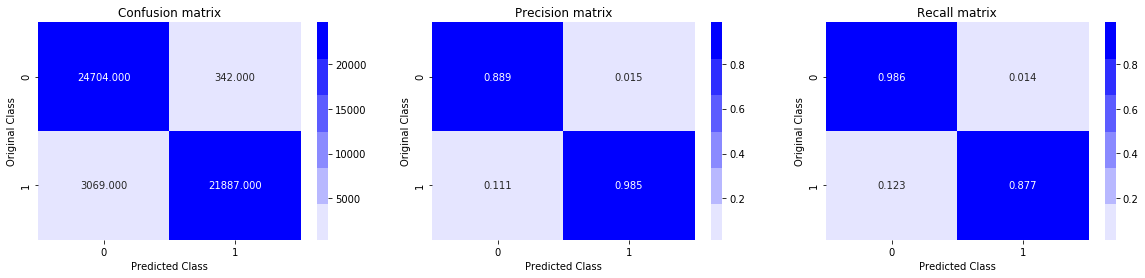

In [ ]:
y2 =np.array(y1>0.5,dtype=int)
print('test confusion matrix')
plot_confusion_matrix(y_test, y2)

train confusion matrix


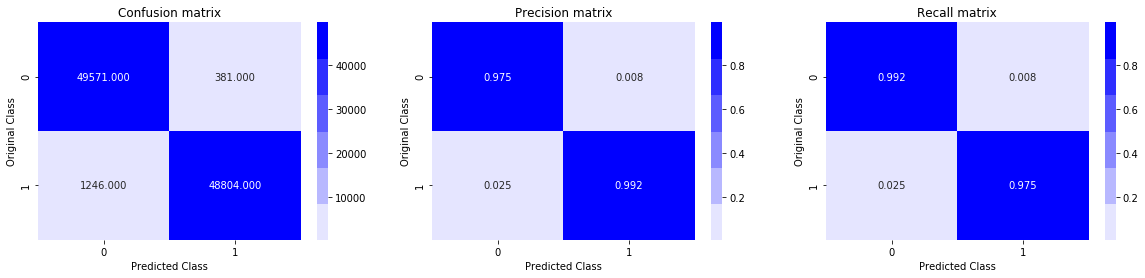

In [ ]:
y1 = bst.predict(d_train)
y2 =np.array(y1>0.5,dtype=int)
print('train confusion matrix')
plot_confusion_matrix(y_train, y2)

In [ ]:
clf=xgb.XGBClassifier(class_weight='balanced',n_estimator=200,max_depth=9,n_jobs=-1)
clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimator=200,
              n_estimators=100, n_jobs=-1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

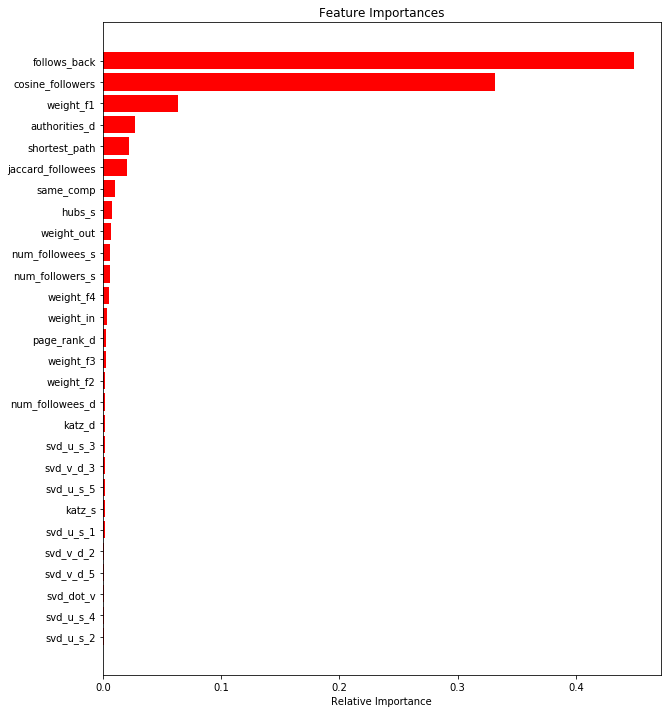

In [ ]:
f1 = x_train.columns
imp = clf.feature_importances_
q = (np.argsort(imp))[-28:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(q)), imp[q], color='r', align='center')
plt.yticks(range(len(q)), [f1[i] for i in q])
plt.xlabel('Relative Importance')
plt.show()

steps:

1.load the data and split into train and test datasets.

2.Preferential attachment:

   1. define two function as preferential_followee() and preferential_follower
  the preferential attachment feature is computed for two vertices,compute both in_degree or out degree.


  2.multiply both in_degrees or out_degress for two features.


  3.find preferntial attachment features for both followee and followers  By passing two vertices at each time and normalize that features

3.svd_dot

  1.compute svd_dot feature with 6_dimension vector of u and for both two vertices.

  2.compute dot product for svd_v and svd_u of both two vertces and normalise that feature.

4.append features to  test and train datasets,hyper tune parameters using xgboost and get the best parameters.

Conclusion:

by using Xgboost with parameters as n_estimators =200 and max_depth=9,got log_loss as 0.3943